In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene, kruskal, pearsonr, spearmanr, probplot

In [2]:
# Load the excel file
df = pd.read_excel('seeds_sentement.xlsx')
print("DataFrame Head:")
print(df.head())

# Extract sentiment scores
sentiment_scores = df['Sentiment'].values

# Calculate basic descriptive statistics
benchmark_value = 0.0 # Common benchmark for neutrality
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)

print("\n--- Descriptive Statistics ---")
print(f"Mean Sentiment Score: {mean_score:.4f}")
print(f"Sample Standard Deviation: {std_dev:.4f}")
print(f"Number of Observations (n): {n}")

DataFrame Head:
              Customer Name  Gender  \
0       Natraj B, Bangalore       1   
1  Sandhya Rani, Bangalore        0   
2        Shovan Chakraborty       1   
3               Placeholder      -1   
4              Vinit Ranjan       1   

                                             Comment    Website  \
0                                       good quality  Bigbasket   
1  become black , bad smell , bad quality , old s...  Bigbasket   
2                                               good     Amazon   
3                                               nice     Amazon   
4  good product , nicely packed - even check auth...   Flipkart   

         Seed Type       Date  Label  \
0    Pumpkin Seeds 2024-02-12      1   
1  Sunflower Seeds 2024-06-11     -1   
2       Flax Seeds 2023-08-10      0   
3    Seasame Seeds 2024-06-30      1   
4    Pumpkin Seeds 2024-01-29      1   

                                           Comment.1  Sentiment  
0                                      

--- Normality Check (Shapiro-Wilk Test) ---
Test Statistic: 0.5203, P-Value: 0.0000
Inference: Data is NOT normally distributed (Reject H0).


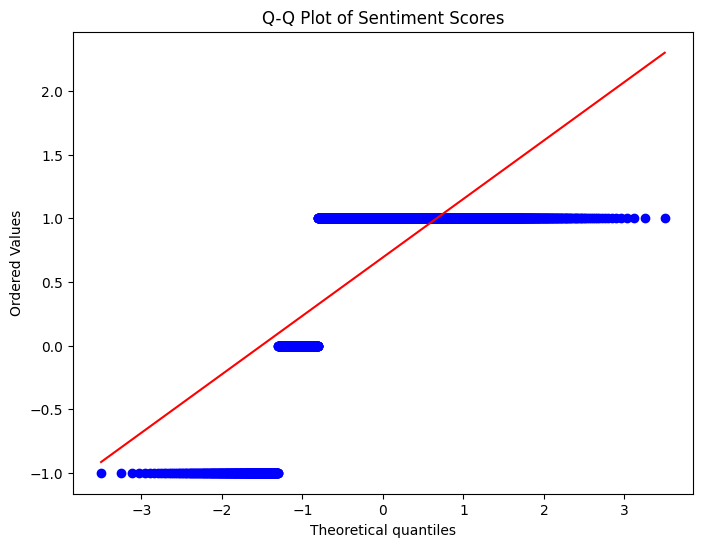

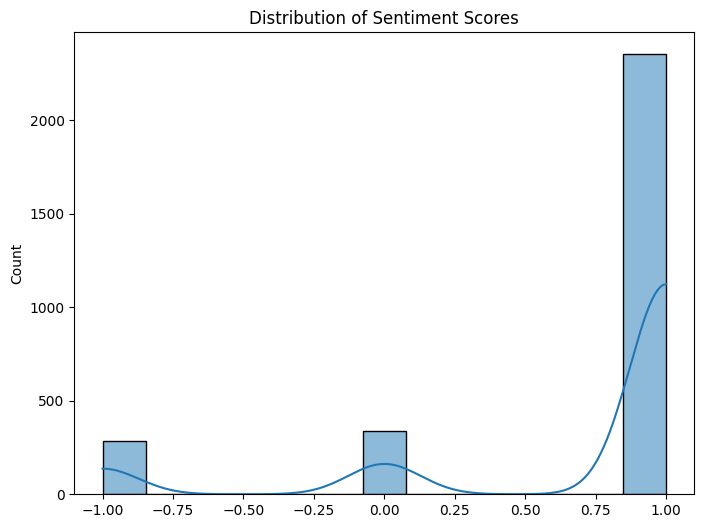

In [3]:
# --- Shapiro-Wilk Test for Normality ---
stat, p_value = shapiro(sentiment_scores)

print("--- Normality Check (Shapiro-Wilk Test) ---")
print(f"Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Inference: Data is normally distributed (Fail to reject H0).")
else:
    print("Inference: Data is NOT normally distributed (Reject H0).")

# --- Q-Q Plot ---
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sentiment Scores')
plt.show()

# --- Histogram ---
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In [4]:
# Group sentiment scores by 'Website'
grouped_sentiments = [group['Sentiment'] for name, group in df.groupby('Website')]
print(f"\nComparing sentiment across {len(grouped_sentiments)} websites.")

# --- Levene's Test for Equal Variances ---
stat, p_value = levene(*grouped_sentiments)

print("\n--- Levene's Test for Equal Variances ---")
print(f"Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Inference: Variances are equal (Fail to reject H0).")
else:
    print("Inference: Variances are NOT equal (Reject H0).")


# --- Kruskal-Wallis H Test (Non-parametric ANOVA) ---
# This is generally preferred if the normality test (Shapiro-Wilk) failed or variances are unequal.
h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)

print("\n--- Kruskal-Wallis H Test (Comparison of Website Groups) ---")
print(f"H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")

if kruskal_p_value < 0.05:
    print("Inference: Reject H0. There is a SIGNIFICANT difference in sentiment distribution between the website groups.")
else:
    print("Inference: Fail to reject H0. No significant difference in sentiment distribution between the website groups.")


Comparing sentiment across 4 websites.

--- Levene's Test for Equal Variances ---
Test Statistic: 68.7627, P-Value: 0.0000
Inference: Variances are NOT equal (Reject H0).

--- Kruskal-Wallis H Test (Comparison of Website Groups) ---
H Statistic: 197.4610, P-Value: 0.0000
Inference: Reject H0. There is a SIGNIFICANT difference in sentiment distribution between the website groups.



--- Correlation (Sentiment vs. Comment Length) ---
Pearson (Linear) Correlation: r = -0.0382, P-Value: 0.0371
Spearman (Rank) Correlation: rho = -0.1551, P-Value: 0.0000
Inference: There is a statistically significant correlation between Sentiment and Comment Length.


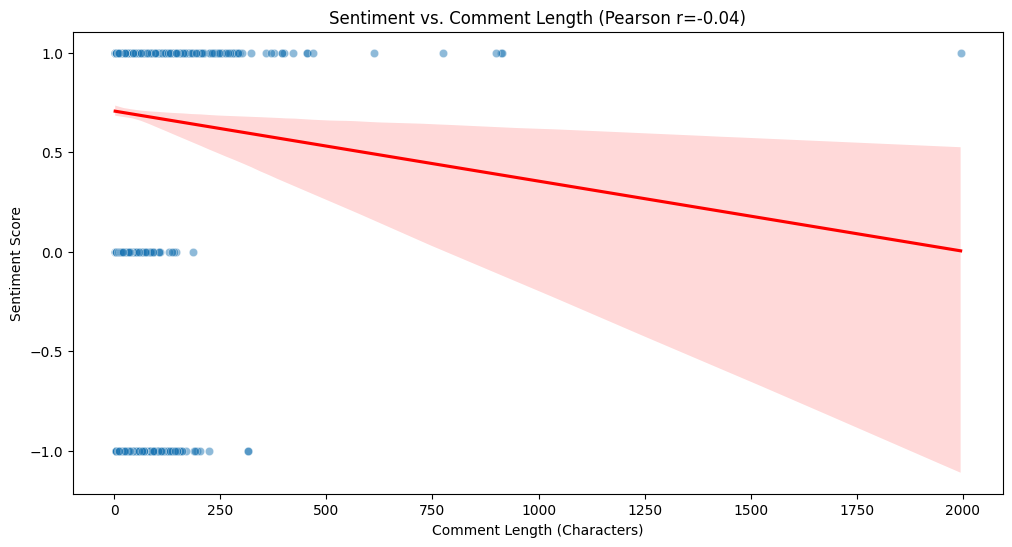

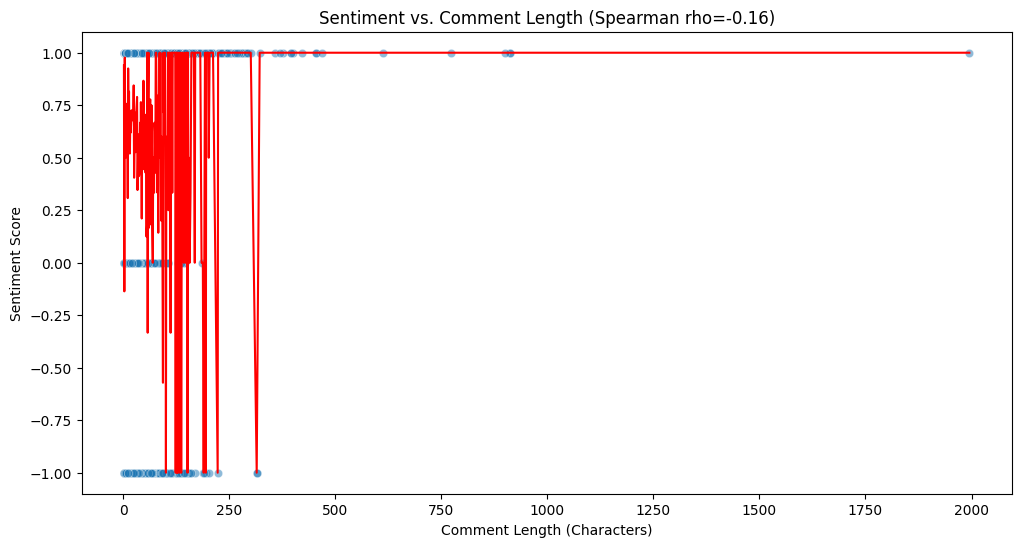

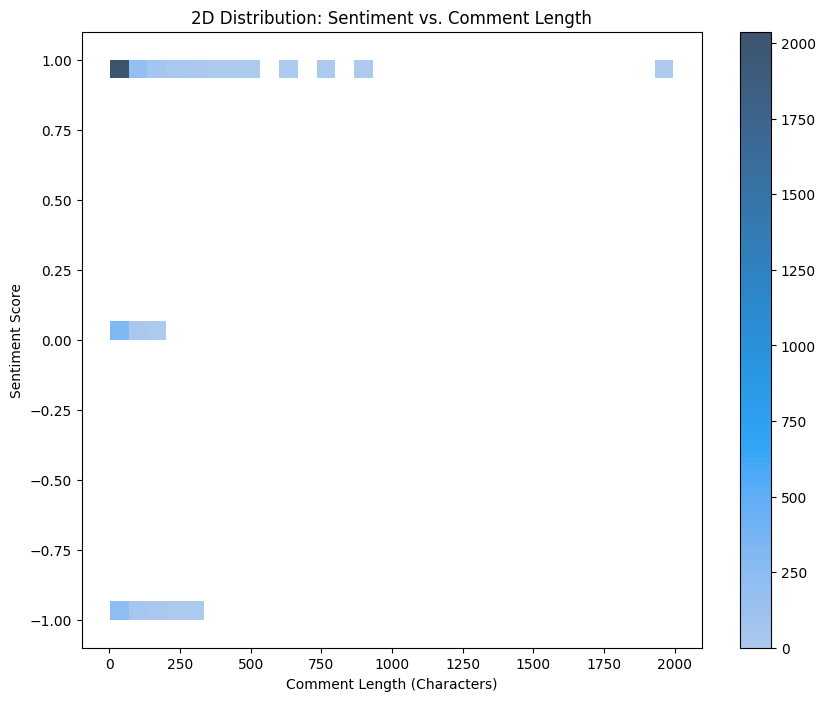

In [5]:
# Calculate the comment length
# Ensure 'Comment' column is string type before calculating length
df['comment_length'] = df['Comment'].astype(str).str.len()

# --- Correlation Calculations (Combined) ---
pearson_corr, pearson_p_value = pearsonr(df['Sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['Sentiment'], df['comment_length'])

print("\n--- Correlation (Sentiment vs. Comment Length) ---")
print(f"Pearson (Linear) Correlation: r = {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman (Rank) Correlation: rho = {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

if spearman_p_value < 0.05:
    print("Inference: There is a statistically significant correlation between Sentiment and Comment Length.")
else:
    print("Inference: There is NO statistically significant correlation between Sentiment and Comment Length.")


# --- Visualizations ---
# 5a. Scatter plot with Linear Regression Line (Pearson visualization)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='Sentiment', data=df, scatter=False, color='r')
plt.title(f'Sentiment vs. Comment Length (Pearson r={pearson_corr:.2f})')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('Sentiment Score')
plt.show()

# 5b. Scatter plot with non-parametric line (Spearman visualization)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
# Use a simple line plot on sorted data to illustrate the non-linear trend captured by Spearman
sns.lineplot(x='comment_length', y='Sentiment',
             data=df.sort_values(by='comment_length'), color='r', errorbar=None)
plt.title(f'Sentiment vs. Comment Length (Spearman rho={spearman_corr:.2f})')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('Sentiment Score')
plt.show()

# 5c. Combined Histogram (2D Distribution) - Note: This plot is sometimes dense.
plt.figure(figsize=(10, 8))
sns.histplot(x="comment_length", y="Sentiment", data=df, bins=30, cbar=True)
plt.title('2D Distribution: Sentiment vs. Comment Length')
plt.xlabel('Comment Length (Characters)')
plt.ylabel('Sentiment Score')
plt.show()